## Sentiment Analysis of Music Lyrics

Music is a powerful language to express our feelings and in many cases is used as a therapy to deal with tough moments in our lives or as a tool to celebrate the joyous moments. The different sounds, rhythms, and effects used in music are capable to modify our emotions for a moment, but there’s a component that sometimes goes unnoticed when we are listening to music; The Lyrics of the songs. Lyrics are powerful texts that share the ideas that came from the mind of the author when the song was been created.

This project will analyze song lyrics from the top 100 Billboard songs spanning the years 1946 to 2022.

### Findings

* Across the positive, negative, and neutral sentiment scores for the song lyrics, the neutral sentiment scores shows a normal distribution while the positive and negative sentiment scores show a distribution that is skewed right. 
* Using the compound sentiment score, there is a visible decrease in the sentiment score as the years go on. This graph suggests that lyrics have a less positive sentiment in more recent years.
    * Years with the lowest compound score: 2018-2022 - tested difference in negative score
    * Years with the highest compound score: 1954, 1947, and 1991 - tested difference in positive score
* Years with conclusive evidence that their positive or negative scores were different than the data set: 2013, 2015, 1977
* Years with inconclusive evidence that their positive or negative scores were different than the data set: 1978, 1991, 2004

### Load Libraries

In [11]:
%pylab inline
import pandas as pd
import scipy.stats as ss
import nltk
from nltk.sentiment import vader, sentiment_analyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

nltk.download('vader_lexicon')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
analyzer = vader.SentimentIntensityAnalyzer()
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


[nltk_data] Downloading package punkt to
[nltk_data]     /home/2fcc22c9-ec7e-4901-9e15-
[nltk_data]     df74cb01cd8c/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/2fcc22c9-ec7e-4901-9e15-
[nltk_data]     df74cb01cd8c/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/2fcc22c9-ec7e-4901-9e15-
[nltk_data]     df74cb01cd8c/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load Data

This may sound bad but I don't remember where I retrieved this dataset. If I had to guess, I got them from Kaggle. The lyrics are already cleaned of punctuation and in lowercase form. Of course, this csv will be included in the repo.

In [32]:
#using latin encoding to import data without error
data = pd.read_csv("https://raw.githubusercontent.com/Meccamarshall/Data620/main/Final/top%20100%201946-2022.csv", encoding='latin-1')

In [34]:
#dropping rows with no lyrics retrieved; will remove nulls and data with excessive spacing
data1 = data.dropna(subset=["Lyrics"])
data1 = data1[~(data1.Lyrics=="  ")&~(data1.Lyrics==" ")]

In [36]:
#just showing rows dropped
print(len(data), len(data1))

6879 6032


### Load Functions

In [39]:
def get_sentiment(data, stop_words):
    """
    Return data with sentiment scores of song lyrics.

        data: data containing the song lyrics. Must have Year and Lyric columns
        stop_words: list pulled from nltk; contains basic words and will be used for removal, i.e. "a","it","the"
        
    This function will tokenize lyric data and analyze the lyric data using Vader lexicon from nltk.
    """
    #create tokens from lyrics
    data["word_tokens"]=data["Lyrics"].apply(word_tokenize)
    #remove stopwords from lyrics
    data["Lyrics_filtered"]=data["word_tokens"].apply(lambda lyrics: " ".join([word for word in lyrics if not word.lower() in stop_words]))
    #calculate sentiment score dataframe - returns positive, neutral, negative, compound scores
    df = data["Lyrics_filtered"].apply(lambda lyrics: analyzer.polarity_scores(lyrics))
    #merges original data with sentiment score dataframe
    data = data.merge(pd.DataFrame(dict(df)).T, left_index=True, right_index=True)
    #filters for columns wanted in final dataset
    data = data[["Year","Lyrics","Lyrics_filtered","neg","neu","pos","compound"]]
    
    return data

## Begin Analysis

### Get Sentiment

In [43]:
#retrieve sentiment scores for lyric data
data2 = get_sentiment(data1, stop_words)
data2.head()

,Year,Lyrics,Lyrics_filtered,neg,neu,pos,compound
0,1946,someone that i belong to doesnt belong to me s...,someone belong doesnt belong someone cant fait...,0.202,0.484,0.313,0.9314
1,1946,a rose must remain with the sun and the rain o...,rose must remain sun rain lovely promise wont ...,0.229,0.638,0.133,-0.7236
2,1946,in a quaint caravan theres a lady they call th...,quaint caravan theres lady call gypsy look fut...,0.113,0.526,0.361,0.9477
3,1946,dear this evening seemed to go so awfully fast...,dear evening seemed go awfully fast much fun y...,0.000,0.868,0.132,0.8971
4,1946,rumors are flying that youve got me sighing th...,rumors flying youve got sighing im crazy kind ...,0.137,0.584,0.279,0.9584


In [44]:
#shows distribution of scores
data2.describe()

,Year,neg,neu,pos,compound
count,6032.000000,6032.000000,6032.000000,6032.000000,6032.000000
mean,1989.029675,0.123201,0.630381,0.246259,0.480078
std,20.129796,0.098912,0.140271,0.138268,0.777685
min,1946.000000,0.000000,0.000000,0.000000,-0.999900
25%,1972.000000,0.050000,0.535000,0.144000,0.000000
50%,1990.000000,0.101000,0.633000,0.225000,0.964350
75%,2006.000000,0.174000,0.730000,0.331000,0.992800
max,2022.000000,0.771000,1.000000,0.833000,0.999900


### Analyze Findings

What I want to know:
* Plot the positive, negative, and neutral sentiment scores and see the patterns
* Plot the compound sentiment scores to see general pattern in sentiment across the years
* Are there any years that the sentiments (pos or neg) were different from all the other years?

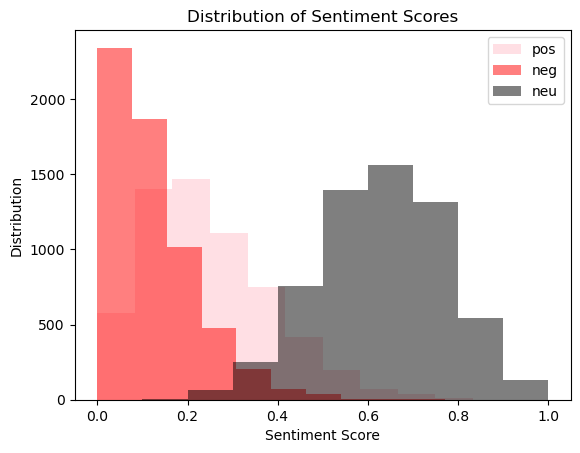

In [173]:
# Plot the histograms with the desired color scheme
plt.hist(data2["pos"], color='pink', alpha=0.5)
plt.hist(data2["neg"], color='red', alpha=0.5)
plt.hist(data2["neu"], color='black', alpha=0.5)

# Set the legend, x-axis label, y-axis label, and title
plt.legend(["pos", "neg", "neu"])
plt.xlabel("Sentiment Score")
plt.ylabel("Distribution")
plt.title("Distribution of Sentiment Scores")

# Display the histograms
plt.show()

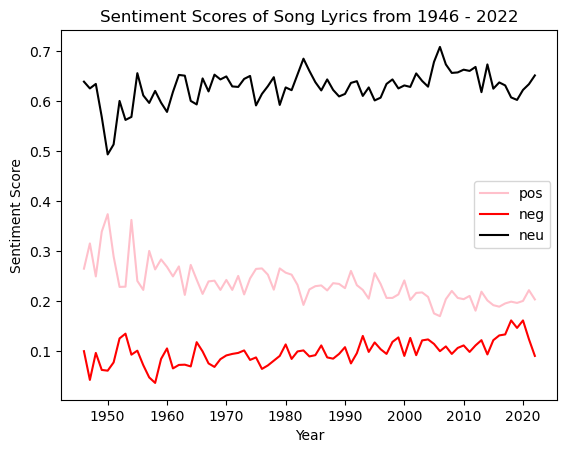

In [171]:
"""
Shows the plots of positive, negative, and neutral sentiment scores. 

I chose to use the median (instead of mean) because there is skewing in the data for positive and negative sentiments (see above).
"""

# Plot the chart with a rainbow color scheme
plt.plot(data2.groupby(by="Year")["pos"].median(), color='pink')
plt.plot(data2.groupby(by="Year")["neg"].median(), color='red')
plt.plot(data2.groupby(by="Year")["neu"].median(), color='black')

# Set the legend, title, x-axis label, and y-axis label
plt.legend(["pos", "neg", "neu"])
plt.title("Sentiment Scores of Song Lyrics from 1946 - 2022")
plt.xlabel("Year")
plt.ylabel("Sentiment Score")

# Display the chart
plt.show()

The compound score combines the positive, neutral, and negative scores for each song lyric. In the graph below, the compound scores are plotted from 1946 through 2022. Several noticeable downward spikes indicate more negative or less positive sentiments in the lyrics. I will compare the scores of the years with significant downward spikes to the negative scores of all other years to determine if there is a significant difference.

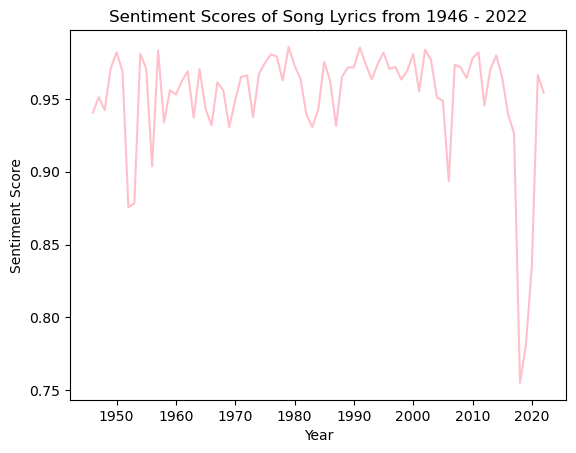

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the chart with a pink color scheme
plt.plot(data2.groupby(by="Year")["compound"].median(), color='pink')

# Set the title, x-axis label, and y-axis label
plt.title("Sentiment Scores of Song Lyrics from 1946 - 2022")
plt.xlabel("Year")
plt.ylabel("Sentiment Score")

# Display the chart
plt.show()

In [54]:
#find 3 years where the spikes occur i.e lowest compound score across 76 years
data2.groupby(by="Year")["compound"].mean().sort_values()[0:3]

Year
2018    0.109524
2019    0.233546
2020    0.248142
Name: compound, dtype: float64

#### Review of the Downward Spike Years
* Find 3 years with the lowest compound score
* Create 3 dataframes (1 for each year) for the years with the lowest compound score
* Perform t-test to retrieve a test statistic and pvalue (are these results significance?)

In [57]:
#find 3 years where the spikes occur i.e lowest compound score across 76 years
data2.groupby(by="Year")["compound"].median().sort_values()[0:3]

Year
2018    0.7550
2019    0.7812
2020    0.8353
Name: compound, dtype: float64

In [59]:
#create dataframe with years with lowest compound score
Y2018 = data2[data2.Year==2018]
Y2019 = data2[data2.Year==2019]
Y2020 = data2[data2.Year==2020]

I decided to perform a t-test on these three years with the following hypotheses:

**Null Hypothesis**: There is no difference between the mean negative sentiment scores of the specified year and the mean negative sentiment scores across all years.

**Alternative Hypothesis**: There is a difference between the mean negative sentiment scores of the specified year and the mean negative sentiment scores across all years.

Among these three years, only 2018 showed a significant result with a p-value less than 0.05. Therefore, I can accept the alternative hypothesis for 2018, indicating a difference in negative sentiment scores compared to other years. For 2019 and 2020, there is no conclusive evidence to support the alternative hypothesis.

In [62]:
result1 = ss.ttest_1samp(Y2018["neg"],data2["neg"].mean())
result1

TtestResult(statistic=3.643301705624756, pvalue=0.0004428629346500847, df=93)

In [64]:
result2=ss.ttest_1samp(Y2019["neg"],data2["neg"].mean())
result2

TtestResult(statistic=4.261355697940055, pvalue=4.785380199448314e-05, df=95)

In [66]:
result3=ss.ttest_1samp(Y2020["neg"],data2["neg"].mean())
result3

TtestResult(statistic=4.564156104083061, pvalue=1.4850823824652532e-05, df=96)

Since the t-test relies on the mean for its analysis, I decided to revisit the graph and plot the mean of the compound scores over the years. This new chart appears different from the previous one, showing more fluctuations across the years. I will select the top 3 years with the highest compound scores and the bottom 3 years with the lowest compound scores. I will then perform the same tests as before using the same hypotheses.

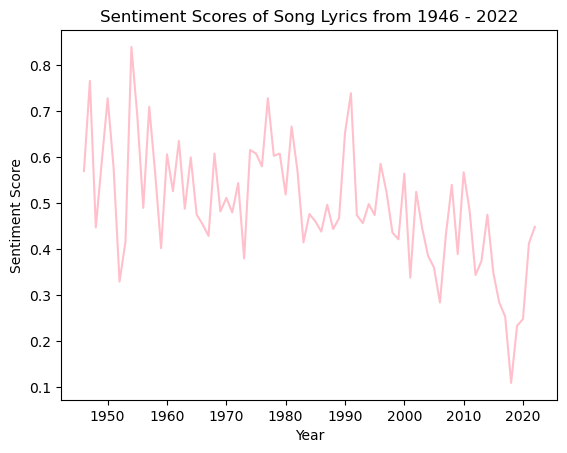

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the chart with a pink color scheme
plt.plot(data2.groupby(by="Year")["compound"].mean(), color='pink')

# Set the title, x-axis label, and y-axis label
plt.title("Sentiment Scores of Song Lyrics from 1946 - 2022")
plt.xlabel("Year")
plt.ylabel("Sentiment Score")

# Display the chart
plt.show()

### Same Hypotheses as Before

**Null Hypothesis**: There is no difference between the mean of the negative (or positive) sentiment scores of the specified year and the mean of the negative sentiment scores across all years.

**Alternative Hypothesis**: There is a difference between the mean of the negative (or positive) sentiment scores of the specified year and the mean of the negative sentiment scores across all years.

#### Tests for Years with the Lowest Compound Scores - Difference in Negative Sentiment (Years 2018-2020)
- Among these three years, only 2018 showed significance with a p-value less than 0.05. Therefore, I can accept the alternative hypothesis for 2018, indicating a difference in negative sentiment scores compared to other years. For 2019 and 2020, there is no conclusive evidence to support the alternative hypothesis.

#### Tests for Years with the Highest Compound Scores - Difference in Positive Sentiment (Years 1954, 1947, and 1991)
- Among these three years, 1954 showed significance with a p-value less than 0.05. Therefore, I can accept the alternative hypothesis for 1954, indicating a difference in positive sentiment scores compared to other years. For 1947 and 1991, there is no conclusive evidence to support the alternative hypothesis.

#### Bottom Years

In [73]:
#find 3 years with lowest compound score across 76 years
data2.groupby(by="Year")["compound"].mean().sort_values()[0:3]

Year
2018    0.109524
2019    0.233546
2020    0.248142
Name: compound, dtype: float64

In [74]:
#create dataframe with years with lowest compound score
Y2018 = data2[data2.Year==2018]
Y2019 = data2[data2.Year==2019]
Y2020 = data2[data2.Year==2020]

In [77]:
result1 = ss.ttest_1samp(Y2018["neg"],data2["neg"].mean())
result1

TtestResult(statistic=3.643301705624756, pvalue=0.0004428629346500847, df=93)

In [79]:
result2=ss.ttest_1samp(Y2019["neg"],data2["neg"].mean())
result2

TtestResult(statistic=4.261355697940055, pvalue=4.785380199448314e-05, df=95)

In [81]:
result3=ss.ttest_1samp(Y2020["neg"],data2["neg"].mean())
result3

TtestResult(statistic=4.564156104083061, pvalue=1.4850823824652532e-05, df=96)

#### Top Years

In [83]:
#find 3 years with highest compound score across 76 years
data2.groupby(by="Year")["compound"].mean().sort_values(ascending=False)[0:3]

Year
1954    0.839179
1947    0.765303
1991    0.738537
Name: compound, dtype: float64

In [85]:
#create dataframe with years with highest compound score
Y1954 = data2[data2.Year==1954]
Y1947 = data2[data2.Year==1947]
Y1991 = data2[data2.Year==1991]

In [87]:
result1 = ss.ttest_1samp(Y1954["pos"],data2["pos"].mean())
result1

TtestResult(statistic=3.816257589812038, pvalue=0.0007181464883584288, df=27)

In [93]:
result2=ss.ttest_1samp(Y1947["pos"],data2["pos"].mean())
result2

TtestResult(statistic=3.0211013228280246, pvalue=0.004921890221360419, df=32)

In [95]:
result3=ss.ttest_1samp(Y1991["pos"],data2["pos"].mean())
result3

TtestResult(statistic=2.311599870651432, pvalue=0.023082851601433745, df=90)

Creating a wordcloud to display the top words used overtime

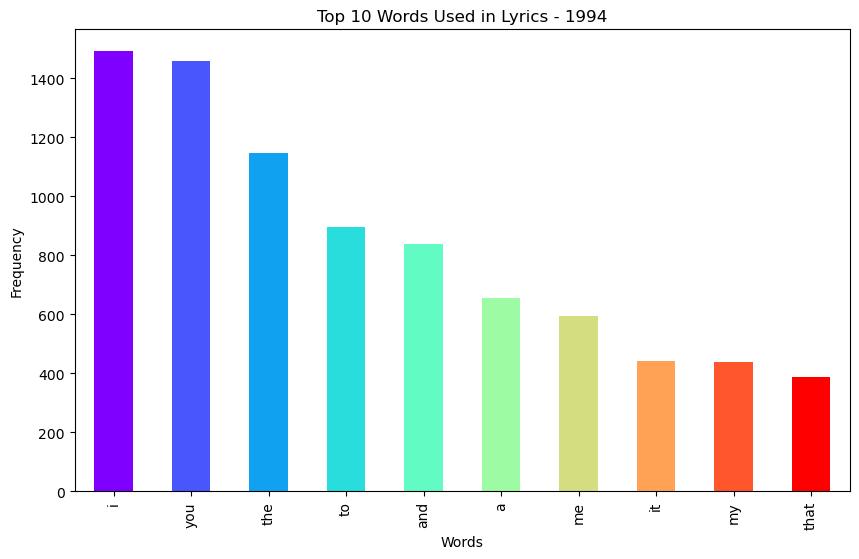

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a dataframe named `data` containing the dataset
# Assuming the dataframe has a column named 'Year' containing the year information

# Filter the dataframe for the year 1994
lyrics_1994 = data[data['Year'] == 1994]['Lyrics']

# Join the lyrics for the year 1994 into a single string
top_lyrics_1994 = ' '.join(str(x) for x in lyrics_1994)

# Split the text into individual words 
words_1994 = top_lyrics_1994.split()

# Count the frequency of each word
word_counts_1994 = pd.Series(words_1994).value_counts()

# Select the top 10 most frequent words
top_10_words_1994 = word_counts_1994.head(10)

# Create a color map with rainbow colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(top_10_words_1994)))

# Plot the bar plot with rainbow colors
plt.figure(figsize=(10, 6))
top_10_words_1994.plot(kind='bar', color=colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words Used in Lyrics - 1994')
plt.show()

Creating a WordCloud to show the most used words from 1946-2022

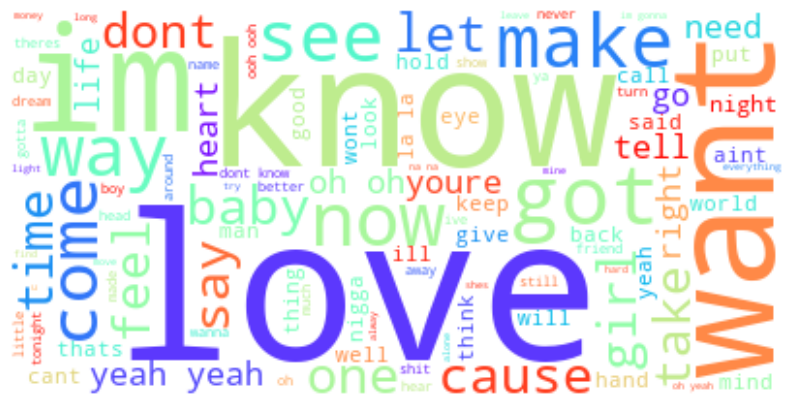

In [156]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

def plot_word_cloud(text, max_words=100, fig_size=(10, 8)):
    wordcloud = WordCloud(max_words=max_words, background_color='white', colormap='rainbow').generate(text)
    plt.figure(figsize=fig_size)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Assuming you have a dataframe named `data` containing the dataset
top_lyrics = ' '.join(data1['Lyrics'])
plot_word_cloud(top_lyrics)

Creating a barplot to display the top 10 words used from 1946-2022

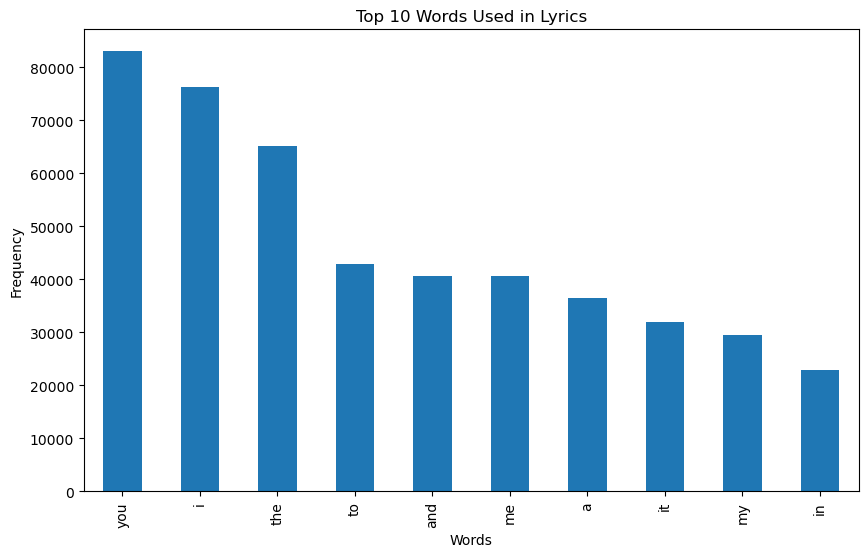

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataframe named `data` containing the dataset
top_lyrics = ' '.join(str(x) for x in data1['Lyrics'])

# Split the text into individual words
words = top_lyrics.split()

# Count the frequency of each word
word_counts = pd.Series(words).value_counts()

# Select the top 10 most frequent words
top_10_words = word_counts.head(10)

# Plot the bar plot
plt.figure(figsize=(10, 6))
top_10_words.plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words Used in Lyrics') 
plt.show()

Displaying the most used words in 1994

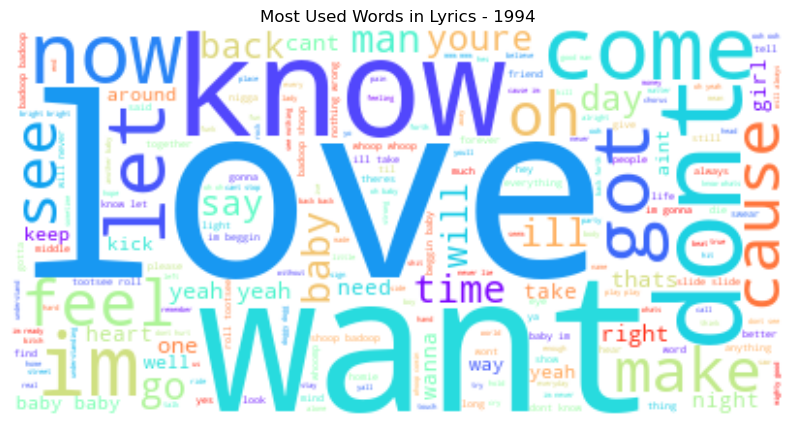

In [158]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataframe named `data1` containing the dataset
# Assuming the dataframe has a column named 'Year' containing the year information

# Filter the dataframe for the year 1994
lyrics_1994 = data1[data1['Year'] == 1994]['Lyrics']

# Join the lyrics for the year 1994 into a single string
top_lyrics_1994 = ' '.join(str(x) for x in lyrics_1994)

# Generate the word cloud
wordcloud = WordCloud(background_color='white', colormap='rainbow').generate(top_lyrics_1994)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Words in Lyrics - 1994')
plt.show()

Displaying Elvis' most used word

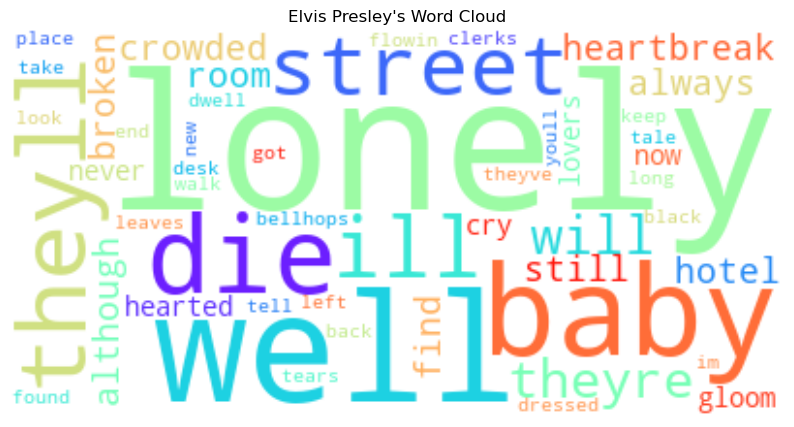

In [160]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataframe named `data1` containing the dataset
# Assuming the dataframe has a column named 'Artist' containing the artist names
# Assuming the dataframe has a column named 'Lyrics' containing the lyrics

# Filter the dataframe for Elvis Presley's lyrics
elvis_lyrics = data1[data1['Artist'] == 'Elvis Presley']['Lyrics']

# Join Elvis Presley's lyrics into a single string
elvis_words = ' '.join(str(x) for x in elvis_lyrics)

# Generate the word cloud
wordcloud = WordCloud(background_color='white', colormap='rainbow').generate(elvis_words)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Elvis Presley's Word Cloud")
plt.show()